# Design of Experiments
The Design of Experiments method chosen was Latin Hypercube Sampling. 
When setting up the experiment, the bounds placed were Rotor OD = [125,302], Rotor ID = [66,90], and Roter thickness = [7.8,28.3] all in units of mm. The outer diameter and thickness bounds were chosen based off of how data found online (4). There was no data found online for the inner diamter, so I used the bound that ANSYS had prepopulated for me. The first response surface method used was the non-parametric regression because the data is highly nonlinear based off of the design of experiments run and my data does not need ot fit exactly with my model. Using this method, it was found that the verification points were highly off from the fit that was calculated with the learning points. In order to try and provide a better fit, I will use Kriging as my response surface method. With this method, the same error occured where my predicted model did not match well to my verification points. Temperature and Equivalent Stress both havelarge relative average errors in the range of about 50. However, the error for the frequency is quite significant, coming out to about 300. To try and fix this error, I will take my 4 verification points and use them as refinement points to help training my model and then increase the number of verification points to 6. With this change, I started to get closer for my average errors but my maximum errors between verification points was still large.






















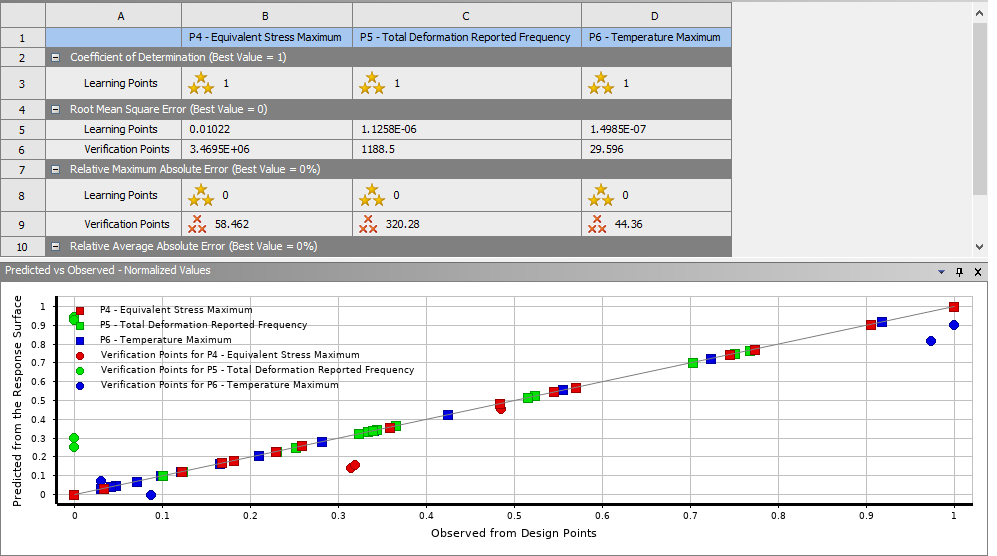

In [2]:
from IPython.display import Image
Image('new_4_points.png')

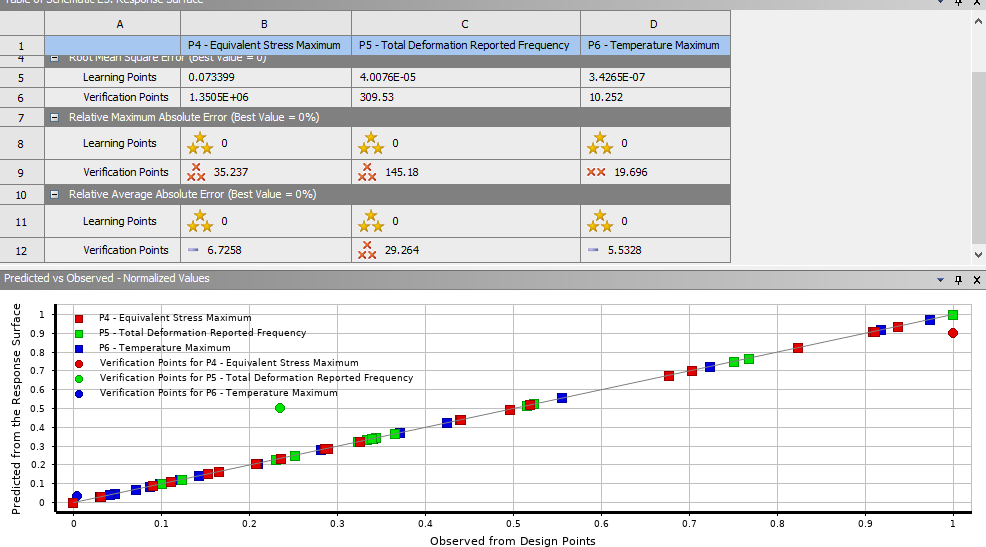

In [3]:
from IPython.display import Image
Image('w_6_points.png')

In [4]:
from IPython.display import Image
Image('w_7_points.png')

FileNotFoundError: No such file or directory: 'w_7_points.png'

FileNotFoundError: No such file or directory: 'w_7_points.png'

<IPython.core.display.Image object>

In [ ]:
# Things to check during your analysis and optimization 
## What are your design variables, constraints, and objectives?
My design variables are the disk's outer diamter and disk's thickness. I chose these as my variables because through doing research on brake disks, these factors were how different brakes were distinguished. I chose my constraint as the disk's inner diameter because during my research I found it was uncommon for the brake disk's inner diamter to be listed so I chose to just keep it the same as what was given in the example. My objectives are to minimize the brake disk's volume, minimize the max stress in the brake disk, maximize the first natural frequency of the brake disk, and minimize the maximum temperature the brake disk is subjected to. In terms of constraints, the resonant frequency for a BMW 5 Series Sedan is 34 Hz, so it is ideal that at a minimum the first natural frequency is above this (1). For a standard road car, the highest temperature their brake disks should be able to handle is 130 degress celsius (2). The final constraint is for the stress in the brake disk which is limited by the factor of safety. The typical factor of safety in an automobile is 3, so the max stress occuring on the brake disk cannot be greater than 1/3 of the maximum stress for the material that the disk is made out of (3). In order to make sure that the chance of failure is low, I am going to choose the max stress at the tensile ultimate stress because it is lower than the compressive one. The ultimate stress is 2.4e8 Pa so the max stress we can subject the brake pad to is 8e7 Pa.
## What are the potential trade-offs between your objectives?
The first natural frequency of the brake disk is inversely related to the maximum stress in the brake disk.
When vol inc: stress inc, freq dec, and temp dec
When vol dec: stress dec, freq inc, and temp inc
When stress inc: unknown relation between stress and freq, and stress and temp
None of the relationships are linear
## Are your variables continuous? Or are they discrete/integer?
My variables are continuous because they can assume any value in the range I give them. Looking at data with brake disk dimensions, they can essentially assume any value within the ranges that are given to them.
## Do you have analytical objective/constraint functions? And are they differentiable?
## Based on the above answers, what optimization methods will you choose?
## Perform a sensitivity analysis and comment on the importance of your variables? Also, do you observe monotonicity (i.e., the objective always goes up or down with a variable)?
## Compare your optimal design against the initial one (e.g., see the following comparison on the brake disc design) AND comment on whether the optimal design is reasonable.
## Insert figure for single-objective vs multi-objetive such as pareto curve or pareto frontier
### References
(1)https://audiojudgement.com/resonant-frequency-car/
(2)https://www.kwik-fit.com/blog/should-brake-discs-get-hot#:~:text=For%20standard%20road%20cars%2C%20you%20should%20expect%20your,cool%20back%20down%2C%20you%20could%20experience%20brake%20fade.
(3)https://whatispiping.com/factor-of-safety/
(4)http://www.blackdiamondperformance.com/pdf/disk_measurements_07_05.pdf